### Average Age Plots

In [6]:
import numpy as np
import datetime

import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

### Remapping the modes from the analysis
from scipy import interpolate
#from matplotlib.mlab import griddata
import matplotlib.path as mpath

import cmocean

from netCDF4 import date2num, num2date


In [ ]:
#define the basic map projection information and figure size

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

#download land mask
# 50m is a good balance between dataset size and land feature resolution
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor='0.0')

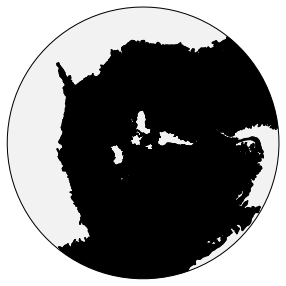

In [101]:
projection=ccrs.NorthPolarStereo(central_longitude=200.0,true_scale_latitude=0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)

#cm=ax.pcolormesh(xi,yi,zi/file_count,transform=transformation,cmap=cmocean.cm.oxy, vmin=0)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')

#plt.colorbar(cm)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='k', alpha=.05))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='k', alpha=1))

In [102]:
import xarray as xa

In [103]:
xdf = xa.open_mfdataset('/Users/bell/in_and_outbox/data_sets/ice_age/nsidc0611_seaice_age_v4/*.nc',combine='by_coords')

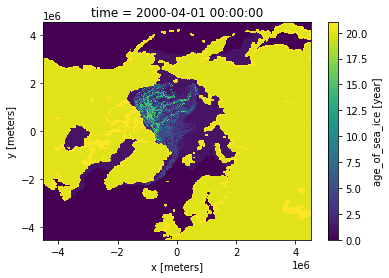

In [104]:
xdf.sel(time=slice('2000-04-01', '2000-04-07')).age_of_sea_ice[0,:,:].plot.pcolormesh()

In [191]:
from matplotlib import colors as c
clist = ['#f1eef6','#bdc9e1','#74a9cf','#2b8cbe','#045a8d','#045a8d']
#clist = ['#377eb8','#a6cee3','#4daf4a','#ff7f00','#e41a1c','#e41a1c']
from matplotlib.colors import from_levels_and_colors
cmap, norm = from_levels_and_colors([0,1.001, 2.001, 3.001, 4.001,5], 
                                    clist,extend='max') # mention levels and colors here


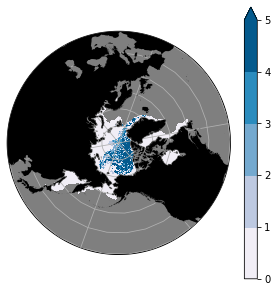

In [193]:
ice_age = xdf.sel(time=slice('2000-04-01', '2000-04-07')).age_of_sea_ice[0,:,:].values
lat = xdf.sel(time=slice('2000-04-01', '2000-04-07')).latitude[0,:,:].values
lon = xdf.sel(time=slice('2000-04-01', '2000-04-07')).longitude[0,:,:].values

ice_age=ice_age.astype(float)
ice_age[ice_age==21] = np.nan
ice_age[ice_age==20] = np.nan
ice_age[ice_age==0] = np.nan

projection=ccrs.NorthPolarStereo(central_longitude=200.0,true_scale_latitude=0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)


plt.colorbar(cm,format='%d')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 10000)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines(zorder=3)
cm=ax.pcolormesh(lon,lat,ice_age,transform=transformation,cmap=cmap,norm=norm, zorder=3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor=None, facecolor='k', alpha=.5))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='grey', facecolor='grey',zorder=3))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=None, facecolor='k', alpha=1,zorder=3))


In [115]:
ice_age[ice_age==21]


array([21, 21, 21, ..., 21, 21, 21], dtype=uint8)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

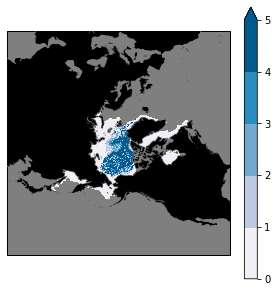

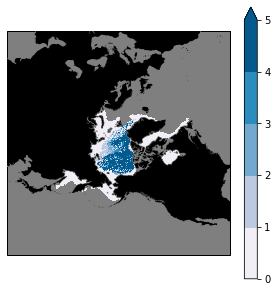

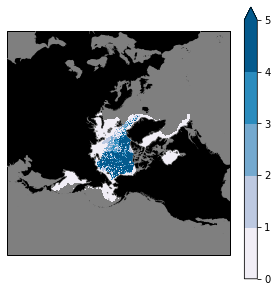

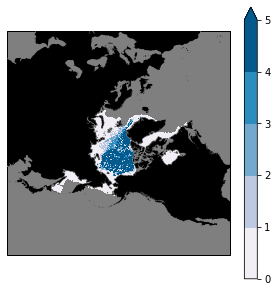

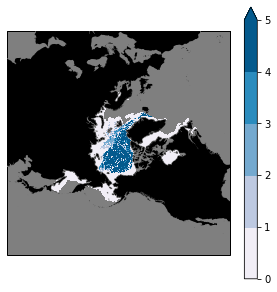

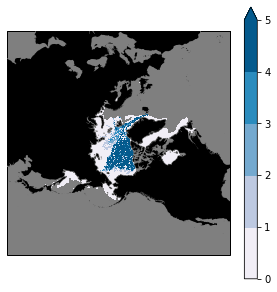

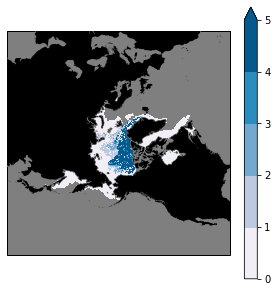

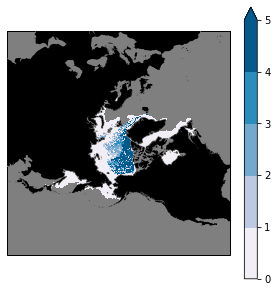

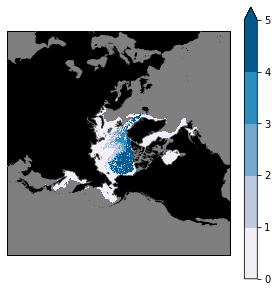

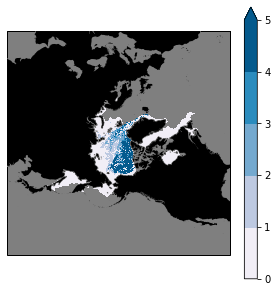

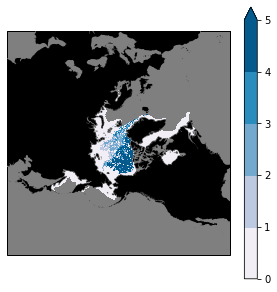

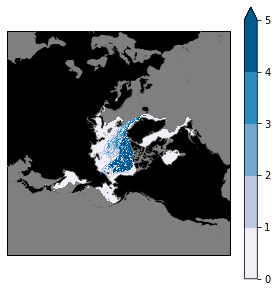

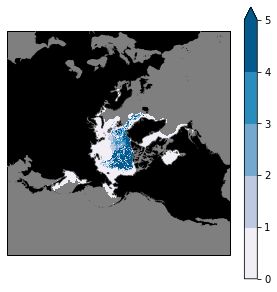

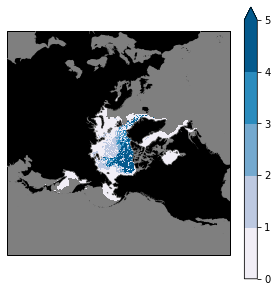

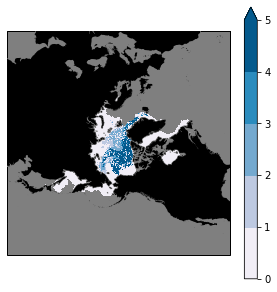

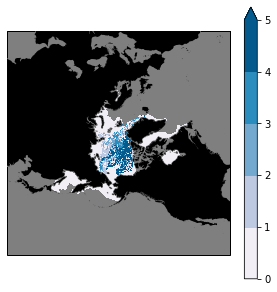

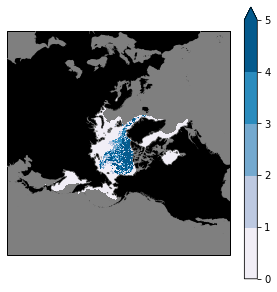

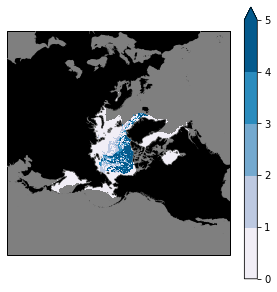

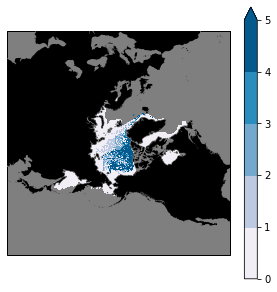

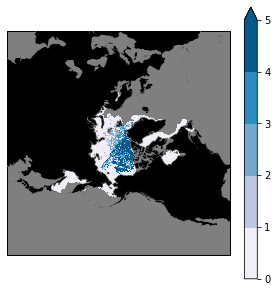

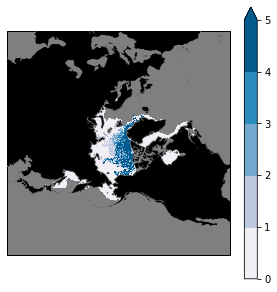

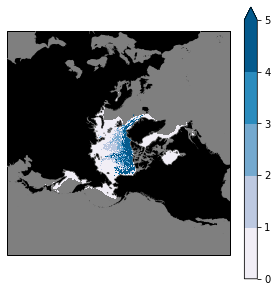

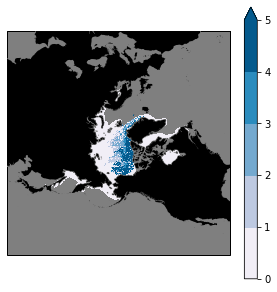

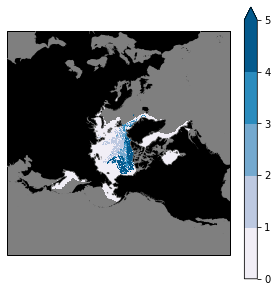

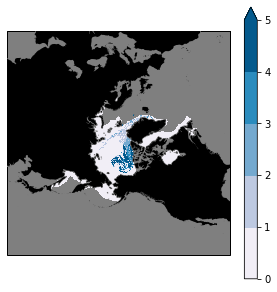

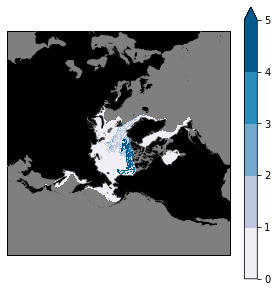

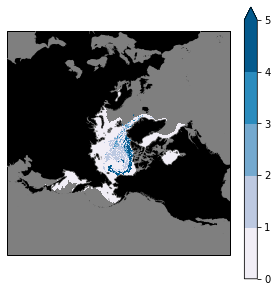

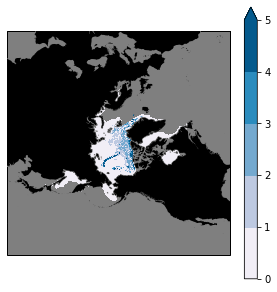

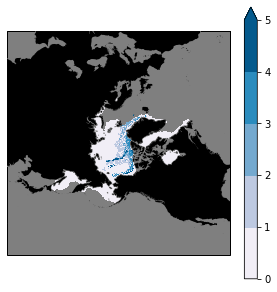

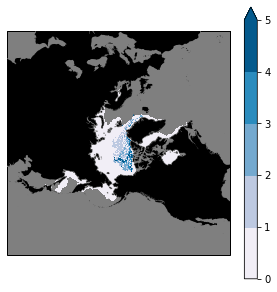

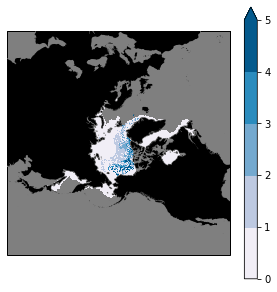

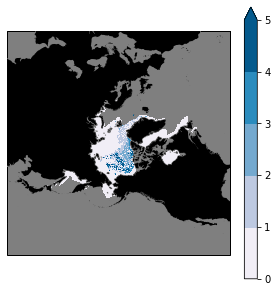

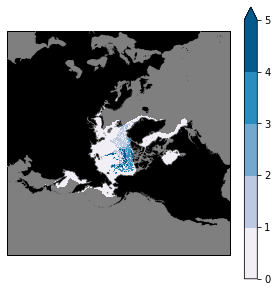

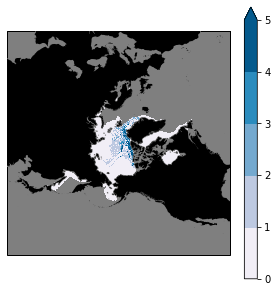

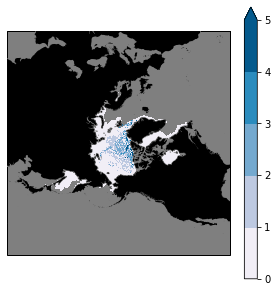

In [201]:
for year in range(1984,2019,1):
    yearstr=str(year)
    ice_age = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07')).age_of_sea_ice[0,:,:].values
    ice_age=ice_age.astype(float)
    ice_age[ice_age==21] = np.nan
    ice_age[ice_age==20] = np.nan
    ice_age[ice_age==0] = np.nan
    lat = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07')).latitude[0,:,:].values
    lon = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07')).longitude[0,:,:].values

    projection=ccrs.NorthPolarStereo(central_longitude=200.0,true_scale_latitude=0)
    transformation=ccrs.PlateCarree()
    fig,ax = make_map(projection=projection)


    plt.colorbar(cm,format='%d')

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 10000)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    #ax.set_boundary(circle, transform=ax.transAxes)
    #ax.gridlines(zorder=3)
    cm=ax.pcolormesh(lon,lat,ice_age,transform=transformation,cmap=cmap,norm=norm, zorder=3)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor=None, facecolor='k', alpha=.5))
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='grey', facecolor='grey',zorder=3))
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=None, facecolor='k', alpha=1,zorder=3))

    fig.savefig(yearstr+'_ice_age.png',dpi=600)
    #fig.savefig(yearstr+'_ice_age.eps')    

1984 4690.46875
1985 4969.6875
1986 5075.3125
1987 5094.84375
1988 4844.21875
1989 4353.90625
1990 4307.03125
1991 4205.9375
1992 4102.03125
1993 4351.25
1994 4082.65625
1995 4182.03125
1996 3765.46875
1997 4495.46875
1998 4255.9375
1999 4436.5625
2000 3811.09375
2001 3926.5625
2002 4121.40625
2003 4061.5625
2004 3903.90625
2005 3895.9375
2006 3465.46875
2007 3382.34375
2008 2270.46875
2009 2426.5625
2010 2877.96875
2011 2745.625
2012 2422.1875
2013 2127.96875
2014 2801.40625
2015 2683.4375
2016 2490.9375
2017 2185.15625
2018 2651.40625
2019 2299.53125


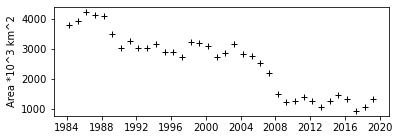

In [202]:
#area extent
ice_age_threshold = 2

fig, ax = plt.subplots(figsize=(6, 2))
for year in range(1984,2020,1):
    yearstr=str(year)
    ice_age = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07')).age_of_sea_ice[0,:,:].values
    
    
    print(yearstr, (np.count_nonzero(((ice_age!=21) & (ice_age!=20)) & (ice_age>1) )*12.5*12.5) / 1000)  #km x km
    ax.plot(datetime.datetime(year,4,1), (np.count_nonzero(((ice_age!=21) & (ice_age!=20)) & (ice_age>ice_age_threshold) )*12.5*12.5) / 1000,'k+')
    ax.set_ylabel('Area *10^3 km^2')

1984 146.5625
1985 274.0625
1986 392.1875
1987 466.71875
1988 417.03125
1989 294.21875
1990 435.9375
1991 225.625
1992 442.96875
1993 325.0
1994 249.84375
1995 188.28125
1996 363.59375
1997 190.3125
1998 261.71875
1999 178.90625
2000 91.71875
2001 54.84375
2002 208.75
2003 343.28125
2004 130.625
2005 143.90625
2006 171.25
2007 144.375
2008 279.375
2009 167.5
2010 224.375
2011 237.8125
2012 17.5
2013 41.40625
2014 189.0625
2015 25.0
2016 121.71875
2017 181.5625
2018 81.40625
2019 101.09375


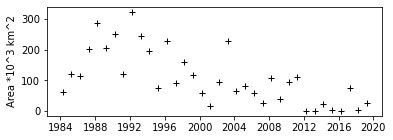

In [210]:
### regional focus
import warnings

#ignore by message
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")

#part of the message is also okay
warnings.filterwarnings("ignore", message="divide by zero encountered") 
warnings.filterwarnings("ignore", message="invalid value encountered")

#boundaries=[65,80,140,165,'RArctic'] #RArctic
#boundaries=[65,80,-150,-120,'CArctic'] #CArctic
#boundaries=[50,80,165,-150,'USArctic'] #USArctic
boundaries=[65,85,7,75,'BarentsAlt'] #KWood BarentsAlt

ice_age_threshold = 1

#area extent
fig, ax = plt.subplots(figsize=(6, 2))
for year in range(1984,2020,1):
    yearstr=str(year)
    xadf = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07'))
    xadf = xdf.sel(time=slice(yearstr+'-09-01', yearstr+'-09-07'))
    ice_age = xadf.where((xadf.latitude >= boundaries[0]) & (xadf.latitude <= boundaries[1]) &
           (xadf.longitude >= boundaries[2])&(xadf.longitude <= boundaries[3])).age_of_sea_ice
    if 'USA' in boundaries[4]:
        ice_age = xadf.where((xadf.latitude >= boundaries[0]) & (xadf.latitude <= boundaries[1]) &
           ((xadf.longitude <= boundaries[3])|(xadf.longitude >= boundaries[2]))).age_of_sea_ice
    print(yearstr, (np.count_nonzero(((ice_age!=21) & (ice_age!=20)) & (ice_age>ice_age_threshold) )*12.5*12.5) / 1000)  #km x km
    ax.plot(datetime.datetime(year,4,1), (np.count_nonzero(((ice_age!=21) & (ice_age!=20)) & (ice_age>2) )*12.5*12.5) / 1000,'k+')
    ax.set_ylabel('Area *10^3 km^2')

In [84]:
xadf =xdf.sel(time=slice('2000-04-01', '2000-04-07'))

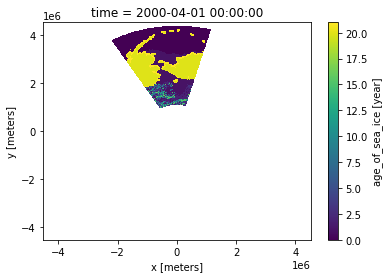

In [95]:
xadf.where((xadf.latitude >= boundaries[0]) & (xadf.latitude <= boundaries[1]) &
           ((xadf.longitude <= boundaries[3])|(xadf.longitude >= boundaries[2]))).age_of_sea_ice.plot()